SPOTIFY project

In [213]:
# import libraries here
import pandas as pd
import numpy as np

# import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import train_test_split

In [99]:
#Import Data Final
final = pd.read_csv('Raw_data/final_database.csv',usecols=[0,2,3,4,5,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,26],low_memory=False)


In [100]:
#Identify nulls in dataset
final.isnull().sum()

Country              0
Popularity           0
Title                0
Artist               0
Album/Single         0
Artist_followers    41
Explicit             0
Album                0
Release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acoustics            0
instrumentalness     0
liveliness           0
valence              0
tempo                0
duration_ms          0
Genre_new            0
dtype: int64

In [103]:
final.head(30)

Country  Popularity            Title                     Artist  \
0        Global    31833.95       adan y eva               Paulo Londra   
1           USA        8.00       adan y eva               Paulo Londra   
2     Argentina    76924.40       adan y eva               Paulo Londra   
3       Belgium      849.60       adan y eva               Paulo Londra   
4   Switzerland    20739.10       adan y eva               Paulo Londra   
5         Chile    60264.20       adan y eva               Paulo Londra   
6      Colombia    60131.15       adan y eva               Paulo Londra   
7    Costa Rica    64081.30       adan y eva               Paulo Londra   
8       Germany      208.00       adan y eva               Paulo Londra   
9       Ecuador    75636.90       adan y eva               Paulo Londra   
10        Spain    69318.35       adan y eva               Paulo Londra   
11        Italy    25361.25       adan y eva               Paulo Londra   
12       Mexico    56380.40       adan y eva               Paulo Londra   
13         Peru    68141.80       adan y eva               Paulo Londra   
14     Portugal    11281.65       adan y eva               Paulo Londra   
15       Taiwan        8.80       adan y eva               Paulo Londra   
16       Global      418.00  it wont kill ya  The Chainsmokers - Louane   
17          USA      581.20  it wont kill ya  The Chainsmokers - Louane   
18           UK      120.80  it wont kill ya  The Chainsmokers - Louane   
19      Austria      404.00  it wont kill ya  The Chainsmokers - Louane   
20    Australia       29.60  it wont kill ya  The Chainsmokers - Louane   
21      Belgium       51.20  it wont kill ya  The Chainsmokers - Louane   
22       Canada      635.80  it wont kill ya  The Chainsmokers - Louane   
23  Switzerland      191.95  it wont kill ya  The Chainsmokers - Louane   
24      Germany      213.60  it wont kill ya  The Chainsmokers - Louane   
25      Finland       55.20  it wont kill ya  The Chainsmokers - Louane   
26       France    23711.40  it wont kill ya  The Chainsmokers - Louane   
27    Indonesia      343.85  it wont kill ya  The Chainsmokers - Louane   
28      Ireland      183.45  it wont kill ya  The Chainsmokers - Louane   
29        Italy       13.60  it wont kill ya  The Chainsmokers - Louane   

   Album/Single Artist_followers Explicit                   Album  \
0        single       11427104.0    False              Adan y Eva   
1        single       11427104.0    False              Adan y Eva   
2        single       11427104.0    False              Adan y Eva   
3        single       11427104.0    False              Adan y Eva   
4        single       11427104.0    False              Adan y Eva   
5        single       11427104.0    False              Adan y Eva   
6        single       11427104.0    False              Adan y Eva   
7        single       11427104.0    False              Adan y Eva   
8        single       11427104.0    False              Adan y Eva   
9        single       11427104.0    False              Adan y Eva   
10       single       11427104.0    False              Adan y Eva   
11       single       11427104.0    False              Adan y Eva   
12       single       11427104.0    False              Adan y Eva   
13       single       11427104.0    False              Adan y Eva   
14       single       11427104.0    False              Adan y Eva   
15       single       11427104.0    False              Adan y Eva   
16        album       16931568.0    False  Memories...Do Not Open   
17        album       16931568.0    False  Memories...Do Not Open   
18        album       16931568.0    False  Memories...Do Not Open   
19        album       16931568.0    False  Memories...Do Not Open   
20        album       16931568.0    False  Memories...Do Not Open   
21        album       16931568.0    False  Memories...Do Not Open   
22        album       16931568.0    False  Memories...Do Not Open   
23        album       1693

In [105]:
#Cleaning data nulls for final database
final.isnull().sum()
final.fillna(0)

Country  Popularity       Title            Artist Album/Single  \
0            Global    31833.95  adan y eva      Paulo Londra       single   
1               USA        8.00  adan y eva      Paulo Londra       single   
2         Argentina    76924.40  adan y eva      Paulo Londra       single   
3           Belgium      849.60  adan y eva      Paulo Londra       single   
4       Switzerland    20739.10  adan y eva      Paulo Londra       single   
...             ...         ...         ...               ...          ...   
170628       Taiwan       31.20   smalltown  Luke Christopher       single   
170629       Taiwan      156.00          灰狼            G.E.M.        album   
170630       Taiwan       90.40        預念患者               張赫宣        album   
170631       Taiwan       21.60        清晨巴士          Crowd Lu        album   
170632       Taiwan       46.40   gettin by               ONE       single   

       Artist_followers Explicit       Album Release_date danceability  ...  \
0            11427104.0    False  Adan y Eva   2018-11-05        0.767  ...   
1            11427104.0    False  Adan y Eva   2018-11-05        0.767  ...   
2            11427104.0    False  Adan y Eva   2018-11-05        0.767  ...   
3            11427104.0    False  Adan y Eva   2018-11-05        0.767  ...   
4            11427104.0    False  Adan y Eva   2018-11-05        0.767  ...   
...                 ...      ...         ...          ...          ...  ...   
170628         152740.0     True   SmallTown   2017-07-07        0.617  ...   
170629        1225408.0    False       摩天動物園   2019-12-26        0.679  ...   
170630             38.0    False     Freedom   2017-06-28        0.421  ...   
170631         149875.0    False    有吉他的流行歌曲   2012-11-20         0.38  ...   
170632         205012.0    False     ONE DAY   2017-07-11        0.743  ...   

                   loudness mode          speechiness            acoustics  \
0                     -4.47    1                0.336  0.32299999999999995   
1                     -4.47    1                0.336  0.32299999999999995   
2                     -4.47    1                0.336  0.32299999999999995   
3                     -4.47    1                0.336  0.32299999999999995   
4                     -4.47    1                0.336  0.32299999999999995   
...                     ...  ...                  ...                  ...   
170628  -6.6770000000000005    1                  0.1  0.14800000000000002   
170629               -8.849    0  0.14800000000000002               0.0952   
170630               -13.24    1               0.0384                0.918   
170631               -9.088    1                0.035   0.8390000000000001   
170632               -3.701    1               0.0558                0.238   

       instrumentalness liveliness valence              tempo duration_ms  \
0                   0.0     0.0676    0.72            171.993      258639   
1                   0.0     0.0676    0.72            171.993      258639   
2                   0.0     0.0676    0.72            171.993      258639   
3                   0.0     0.0676    0.72            171.993      258639   
4                   0.0     0.0676    0.72            171.993      258639   
...                 ...        ...     ...                ...         ...   
170628              0.0      0.333   0.526  79.97399999999998      140825   
170629         0.000539     0.0921   0.316            133.951      203418   
170630              0.0      0.102    0.27            131.917      309526   
170631              0.0     0.0935   0.417  66.53699999999999      264480   
170632              0.0      0.196   0.642             92.961      213542   

       Genre_new  
0        hip hop  
1        hip hop  
2        hip hop  
3        hip hop  
4        hip hop  
...          ...  
170628       pop  
170629       pop  
170630      else  
170631     indie  
170632       rap  

[170633 rows x 22 columns]

In [147]:
#Make all column titles be lower case
final.columns= final.columns.str.lower()

In [174]:
final.sort_values(by="popularity",ascending=False)[['country','popularity']]

country  popularity
52641       Belgium    233766.9
52647    Costa Rica    228707.2
52635        Global    221571.0
30479   Philippines    217605.8
52667     Singapore    217307.4
...             ...         ...
109279      Austria         0.8
84316           USA         0.8
54976        Global         0.8
36285        Global         0.8
133951        Spain         0.8

[170633 rows x 2 columns]

In [177]:
#This is the filtered dataset
dp = final[final['country']=="Global"].sort_values(by="popularity",ascending=False)
dp

country  popularity                    title  \
52635  Global   221571.00             shape of you   
60179  Global   157270.00             dance monkey   
83394  Global   130062.25                  bad guy   
14213  Global   129769.90                  perfect   
71356  Global   111896.05                  shallow   
...       ...         ...                      ...   
15747  Global        0.80                    loose   
83163  Global        0.80           september song   
22250  Global        0.80            be my mistake   
36285  Global        0.80  a holly jolly christmas   
80507  Global        0.80                 weit weg   

                           artist album/single artist_followers explicit  \
52635                  Ed Sheeran        album       71783101.0    False   
60179                 Tones And I       single          2283019    False   
83394               Billie Eilish        album         34697267    False   
14213                  Ed Sheeran        album       71783101.0    False   
71356  Lady Gaga - Bradley Cooper        album         14439685    False   
...                           ...          ...              ...      ...   
15747                 S1mba - KSI       single          31441.0     True   
83163                   JP Cooper        album           573480    False   
22250                    The 1975        album        4472646.0    False   
36285              Brett Eldredge        album        1198447.0    False   
80507                   Rammstein        album          5126749    False   

                                           album release_date  \
52635                                 ÷ (Deluxe)   2017-03-03   
60179                               Dance Monkey   2019-05-10   
83394   WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?   2019-03-29   
14213                                 ÷ (Deluxe)   2017-03-03   
71356                  A Star Is Born Soundtrack   2018-10-05   
...                                          ...          ...   
15747                          Loose (feat. KSI)   2020-09-11   
83163           Raised Under Grey Skies (Deluxe)   2017-10-06   
22250  A Brief Inquiry Into Online Relationships   2018-11-30   
36285                      Glow (Deluxe Edition)   2018-10-26   
80507                                  RAMMSTEIN   2019-05-17   

              danceability  ...             loudness mode speechiness  \
52635                0.825  ...  -3.1830000000000003    0      0.0802   
60179                0.825  ...               -6.401    0      0.0988   
83394                0.701  ...              -10.965    1       0.375   
14213                0.599  ...               -6.312    1      0.0232   
71356   0.5720000000000001  ...               -6.362    1      0.0308   
...                    ...  ...                  ...  ...         ...   
15747   0.8370000000000001  ...               -4.884    1      0.0763   
83163                0.622  ...   -6.702000000000001    0       0.038   
22250   0.5720000000000001  ...              -14.405    1      0.0344   
36285   0.6809999999999999  ...               -8.623    0      0.0423   
80507  0.35100000000000003  ...               -5.109    1      0.0508   

      acoustics        instrumentalness           liveliness  \
52635     0.581                     0.0               0.0931   
60179     0.688                0.000161                 0.17   
83394     0.328                    0.13                  0.1   
14213     0.163                     0.0                0.106   
71356     0.371                     0.0                0.231   
...         ...                     ...                  ...   
15747    0.0434                     0.0                0.141   
83163    0.0455                     0.0               0.0903   
22250     0.835  0.00013700000000000002               0.0906   
36285     0.621                1.24e-06  0.13699999999999998   
80507    0.0112                0.000292                0.166   

                 

In [114]:
top = dp.iloc[0:500]

In [115]:
low = dp.iloc[-500:-1]
low

country  popularity                    title  \
72870  Global        21.6               wanted you   
74181  Global        21.6                hollywood   
74175  Global        21.6                teardrops   
4616   Global        21.6               inspire me   
10217  Global        21.6            best day ever   
...       ...         ...                      ...   
21699  Global         0.8              din din din   
15747  Global         0.8                    loose   
83163  Global         0.8           september song   
22250  Global         0.8            be my mistake   
36285  Global         0.8  a holly jolly christmas   

                                        artist album/single artist_followers  \
72870                       NAV - Lil Uzi Vert        album          2237000   
74181  Gorillaz - Snoop Dogg - Jamie Principle        album          6111598   
74175                     Bring Me The Horizon        album          3266166   
4616                                  Big Sean        album        7838718.0   
10217                               Mac Miller        album        5013742.0   
...                                        ...          ...              ...   
21699        Ludmilla - Mc Doguinha - MC Pupio       single        3539922.0   
15747                              S1mba - KSI       single          31441.0   
83163                                JP Cooper        album           573480   
22250                                 The 1975        album        4472646.0   
36285                           Brett Eldredge        album        1198447.0   

      explicit                                              album  \
72870     True                                           RECKLESS   
74181     True                                        The Now Now   
74175     True                        POST HUMAN: SURVIVAL HORROR   
4616      True                                         I Decided.   
10217     True  Best Day Ever (5th Anniversary Remastered Edit...   
...        ...                                                ...   
21699    False  Din Din Din (Participação especial de MC Pupio...   
15747     True                                  Loose (feat. KSI)   
83163    False                   Raised Under Grey Skies (Deluxe)   
22250    False          A Brief Inquiry Into Online Relationships   
36285    False                              Glow (Deluxe Edition)   

      release_date        danceability  ...             loudness mode  \
72870   2018-05-18               0.797  ...  -4.4430000000000005    0   
74181   2018-06-29               0.685  ...              -10.338    1   
74175   2020-10-30  0.4970000000000001  ...               -3.323    1   
4616    2017-02-03               0.713  ...               -7.245    0   
10217   2016-06-03               0.305  ...                -4.55    1   
...            ...                 ...  ...                  ...  ...   
21699   2018-06-06  0.8690000000000001  ...               -5.841    1   
15747   2020-09-11  0.8370000000000001  ...               -4.884    1   
83163   2017-10-06               0.622  ...   -6.702000000000001    0   
22250   2018-11-30  0.5720000000000001  ...              -14.405    1   
36285   2018-10-26  0.6809999999999999  ...               -8.623    0   

      speechiness acoustics        instrumentalness           liveliness  \
72870      0.0479     0.229                     0.0                0.224   
74181      0.0926    0.0249   7.670000000000001e-05                0.211   
74175       0.108  0.000323                     0.0                 0.36   
4616        0.264     0.336                     0.0                0.231   
10217      0.0449    0.0466                     0.0                0.193   
...           ...       ...                     ...                  ...   
21699        0.23     0.214                     0.0               0.0527   
15747      0.0763    0.0434                     0.0                0.141   
83163 

In [178]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5461 entries, 52635 to 80507
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           5461 non-null   object 
 1   popularity        5461 non-null   float64
 2   title             5461 non-null   object 
 3   artist            5461 non-null   object 
 4   album/single      5461 non-null   object 
 5   artist_followers  5460 non-null   object 
 6   explicit          5461 non-null   object 
 7   album             5461 non-null   object 
 8   release_date      5461 non-null   object 
 9   danceability      5461 non-null   object 
 10  energy            5461 non-null   object 
 11  key               5461 non-null   object 
 12  loudness          5461 non-null   object 
 13  mode              5461 non-null   object 
 14  speechiness       5461 non-null   object 
 15  acoustics         5461 non-null   object 
 16  instrumentalness  5461 non-null   obj

In [218]:
#Make all numeric columns be converted from objects to floats
dp['danceability'] = dp['danceability'].astype(float)
dp['energy'] = dp['energy'].astype(float)
dp['key'] = dp['key'].astype(float)
dp['loudness'] = dp['loudness'].astype(float)
dp['speechiness'] = dp['speechiness'].astype(float)
dp['mode'] = dp['mode'].astype(float)
dp['instrumentalness'] = dp['instrumentalness'].astype(float)
dp['valence'] = dp['valence'].astype(float)
dp['tempo'] = dp['tempo'].astype(float)
dp['duration_ms'] = dp['duration_ms'].astype(float)
dp['liveliness'] = dp['liveliness'].astype(float)
dp['acoustics'] = dp['acoustics'].astype(float)
dp.dtypes

country              object
popularity          float64
title                object
artist               object
album/single         object
artist_followers     object
explicit             object
album                object
release_date         object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acoustics           float64
instrumentalness    float64
liveliness          float64
valence             float64
tempo               float64
duration_ms         float64
genre_new            object
dtype: object

In [180]:
#Convert duration from miliseconds to seconds
dp['duration_ms'] = (dp['duration_ms'] / 100).round(2)

In [181]:
sp = dp.groupby('genre_new').mean()
sp

popularity  danceability    energy       key   loudness  \
genre_new                                                                    
bolero              39.600000      0.459000  0.489500  0.000000 -10.239000   
boy band          3473.236628      0.658047  0.684593  4.639535  -5.223081   
country           2964.269643      0.564571  0.583929  4.964286  -6.680929   
dance/electronic  7264.564865      0.644622  0.690209  4.844595  -5.646966   
else              1473.254245      0.622547  0.622238  5.292453  -7.686255   
funk              1445.881818      0.783182  0.699545  5.036364  -5.228327   
hip hop           2249.232165      0.741181  0.630435  5.171689  -6.681040   
house             5075.038934      0.626492  0.714115  5.180328  -5.445590   
indie             2658.720455      0.617500  0.642000  5.742424  -6.449015   
k-pop             1956.799580      0.650908  0.750353  5.252101  -4.975832   
latin             8634.954167      0.738799  0.738931  5.738506  -4.558908   
metal              229.240741      0.503827  0.782614  5.543210  -6.002185   
pop               6706.823300      0.647118  0.611728  5.249707  -6.519021   
r&b/soul          5765.775278      0.615706  0.550906  4.661111  -7.895306   
rap               5597.545519      0.719151  0.602558  5.099573  -6.755568   
reggaeton         8054.444643      0.754679  0.695321  6.464286  -4.234964   
rock              2987.407538      0.573673  0.658346  5.281407  -7.219668   
trap              2212.234211      0.738000  0.627860  5.842105  -6.723667   

                      mode  speechiness  acoustics  instrumentalness  \
genre_new                                                              
bolero            0.500000     0.034100   0.402850          0.000000   
boy band          0.674419     0.078910   0.147844          0.000074   
country           0.857143     0.039014   0.336940          0.000040   
dance/electronic  0.641892     0.081232   0.167229          0.020068   
else              0.594340     0.103322   0.315690          0.024489   
funk              0.563636     0.141009   0.303367          0.005109   
hip hop           0.540294     0.214950   0.185566          0.009450   
house             0.500000     0.059780   0.147749          0.028327   
indie             0.530303     0.100876   0.312923          0.031151   
k-pop             0.521008     0.104392   0.126792          0.010564   
latin             0.563218     0.117175   0.220792          0.002228   
metal             0.629630     0.066212   0.060612          0.100911   
pop               0.601407     0.091072   0.262692          0.006936   
r&b/soul          0.555556     0.111556   0.332706          0.053980   
rap               0.516358     0.173683   0.212939          0.007774   
reggaeton         0.392857     0.161814   0.303732          0.000813   
rock              0.778894     0.056923   0.179687          0.022239   
trap              0.438596     0.244875   0.196278          0.006350   

                  liveliness   valence       tempo  duration_ms  
genre_new                                                        
bolero              0.113650  0.387000   89.794500  2451.200000  
boy band            0.159362  0.553058  121.702826  1971.700233  
country             0.167782  0.516357  112.656964  1912.432500  
dance/electronic    0.167833  0.457854  119.991115  2118.842230  
else                0.191534  0.530173  118.614198  1987.498491  
funk                0.167062  0.730436  129.356618  1764.513818  
hip hop             0.191999  0.444027  125.183336  2090.113735  
house               0.191800  0.448269  119.005713  2005.739754  
indie               0.197892  0.461105  123.590515  2199.375303  
k-pop               0.175962  0.510832  124.909647  2160.719160  
latin               0.193641  0.650032  129.438891  2156.808420  
metal               0.216457  0.415267  121.403222  2694.625802  
pop                 0.170876  0.489568  117.776319  2060.167790  
r&b/soul            0.17317

In [182]:
dp.describe()

popularity  danceability       energy          key     loudness  \
count    5461.000000   5461.000000  5461.000000  5461.000000  5461.000000   
mean     4818.562159      0.682245     0.636217     5.218824    -6.429909   
std     12194.645344      0.147140     0.168769     3.669134     2.609928   
min         0.800000      0.125000     0.013700     0.000000   -34.475000   
25%        67.200000      0.594000     0.534000     1.000000    -7.561000   
50%       464.300000      0.699000     0.651000     5.000000    -6.044000   
75%      3235.950000      0.789000     0.760000     8.000000    -4.748000   
max    221571.000000      0.974000     0.996000    11.000000     1.509000   

              mode  speechiness    acoustics  instrumentalness   liveliness  \
count  5461.000000  5461.000000  5461.000000       5461.000000  5461.000000   
mean      0.572789     0.136475     0.221819          0.012247     0.180508   
std       0.494719     0.122334     0.239866          0.076126     0.139276   
min       0.000000     0.023200     0.000002          0.000000     0.019700   
25%       0.000000     0.046700     0.038800          0.000000     0.097400   
50%       1.000000     0.083700     0.133000          0.000000     0.125000   
75%       1.000000     0.195000     0.321000          0.000035     0.214000   
max       1.000000     0.966000     0.994000          0.956000     0.988000   

           valence        tempo  duration_ms  
count  5461.000000  5461.000000  5461.000000  
mean      0.481125   122.454060  2056.962503  
std       0.223503    29.779143   516.814113  
min       0.026200    45.780000   301.330000  
25%       0.308000    97.981000  1765.910000  
50%       0.475000   120.098000  2012.800000  
75%       0.652000   143.783000  2286.620000  
max       0.982000   216.334000  9435.290000

In [154]:
dp.groupby('explicit').count()['title']

explicit
False    2884
True     2577
Name: title, dtype: int64

In [156]:
print(type(dp['genre_new']))
popular_genre=dp.groupby('genre_new').size().unique
print(popular_genre)
genre_list=dp['genre_new'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of genre_new
bolero                 2
boy band              86
country               28
dance/electronic     148
else                 106
funk                  55
hip hop             1427
house                122
indie                 66
k-pop                119
latin                348
metal                 81
pop                 1706
r&b/soul             180
rap                  703
reggaeton             28
rock                 199
trap                  57
dtype: int64>


In [158]:
dp.value_counts("artist").head(50)

artist
Drake                  66
BTS                    60
Taylor Swift           55
Future                 46
Juice WRLD             46
Ariana Grande          45
Lil Uzi Vert           44
XXXTENTACION           44
Logic                  39
Eminem                 35
The Weeknd             34
Linkin Park            32
Post Malone            30
Trippie Redd           29
Sam Smith              28
Imagine Dragons        28
Harry Styles           27
Ed Sheeran             26
Lana Del Rey           26
Billie Eilish          26
Migos                  26
Khalid                 25
Bad Bunny              24
Mac Miller             24
Shawn Mendes           23
Camila Cabello         23
Bryson Tiller          22
Twenty One Pilots      22
21 Savage              21
Selena Gomez           21
J. Cole                21
Travis Scott           21
Joji                   20
Dua Lipa               20
Ozuna                  20
One Direction          20
Lady Gaga              20
Halsey                 19
5 Sec

In [163]:
dp.groupby("genre_new").mean()

danceability    energy       key   loudness      mode  \
genre_new                                                                 
bolero                0.459000  0.489500  0.000000 -10.239000  0.500000   
boy band              0.658047  0.684593  4.639535  -5.223081  0.674419   
country               0.564571  0.583929  4.964286  -6.680929  0.857143   
dance/electronic      0.644622  0.690209  4.844595  -5.646966  0.641892   
else                  0.622547  0.622238  5.292453  -7.686255  0.594340   
funk                  0.783182  0.699545  5.036364  -5.228327  0.563636   
hip hop               0.741181  0.630435  5.171689  -6.681040  0.540294   
house                 0.626492  0.714115  5.180328  -5.445590  0.500000   
indie                 0.617500  0.642000  5.742424  -6.449015  0.530303   
k-pop                 0.650908  0.750353  5.252101  -4.975832  0.521008   
latin                 0.738799  0.738931  5.738506  -4.558908  0.563218   
metal                 0.503827  0.782614  5.543210  -6.002185  0.629630   
pop                   0.647118  0.611728  5.249707  -6.519021  0.601407   
r&b/soul              0.615706  0.550906  4.661111  -7.895306  0.555556   
rap                   0.719151  0.602558  5.099573  -6.755568  0.516358   
reggaeton             0.754679  0.695321  6.464286  -4.234964  0.392857   
rock                  0.573673  0.658346  5.281407  -7.219668  0.778894   
trap                  0.738000  0.627860  5.842105  -6.723667  0.438596   

                  speechiness  acoustics  instrumentalness  liveliness  \
genre_new                                                                
bolero               0.034100   0.402850          0.000000    0.113650   
boy band             0.078910   0.147844          0.000074    0.159362   
country              0.039014   0.336940          0.000040    0.167782   
dance/electronic     0.081232   0.167229          0.020068    0.167833   
else                 0.103322   0.315690          0.024489    0.191534   
funk                 0.141009   0.303367          0.005109    0.167062   
hip hop              0.214950   0.185566          0.009450    0.191999   
house                0.059780   0.147749          0.028327    0.191800   
indie                0.100876   0.312923          0.031151    0.197892   
k-pop                0.104392   0.126792          0.010564    0.175962   
latin                0.117175   0.220792          0.002228    0.193641   
metal                0.066212   0.060612          0.100911    0.216457   
pop                  0.091072   0.262692          0.006936    0.170876   
r&b/soul             0.111556   0.332706          0.053980    0.173174   
rap                  0.173683   0.212939          0.007774    0.174942   
reggaeton            0.161814   0.303732          0.000813    0.176175   
rock                 0.056923   0.179687          0.022239    0.182442   
trap                 0.244875   0.196278          0.006350    0.168104   

                   valence       tempo  duration_ms  
genre_new                                            
bolero            0.387000   89.794500  2451.200000  
boy band          0.553058  121.702826  1971.700233  
country           0.516357  112.656964  1912.432500  
dance/electronic  0.457854  119.991115  2118.842230  
else              0.530173  118.614198  1987.498491  
funk              0.730436  129.356618  1764.513818  
hip hop           0.444027  125.183336  2090.113735  
house             0.448269  119.005713  2005.739754  
indie             0.461105  123.590515  2199.375303  
k-pop             0.510832  124.909647  2160.719160  
latin             0.650032  129.438891  2156.808420  
metal             0.415267  121.403222  2694.625802  
pop               0.489568  117.776319  2060.167790  
r&b/soul          0.405082  119.814889  2038.997444  
rap               0.433275  126.291882  1828.414623  
reggaeton         0.692632  127.164964  2085.562500  
rock              0.502141  122.241060  2278.060704  
trap      

In [187]:
dp.nlargest(500,'popularity').mean()


popularity          35112.243600
danceability            0.713824
energy                  0.647540
key                     5.500000
loudness               -5.810798
mode                    0.560000
speechiness             0.117208
acoustics               0.202813
instrumentalness        0.005291
liveliness              0.165183
valence                 0.519011
tempo                 120.254954
duration_ms          2074.590400
dtype: float64

In [209]:
dp.describe()

popularity  danceability       energy          key     loudness  \
count    5461.000000   5461.000000  5461.000000  5461.000000  5461.000000   
mean     4818.562159      0.682245     0.636217     5.218824    -6.429909   
std     12194.645344      0.147140     0.168769     3.669134     2.609928   
min         0.800000      0.125000     0.013700     0.000000   -34.475000   
25%        67.200000      0.594000     0.534000     1.000000    -7.561000   
50%       464.300000      0.699000     0.651000     5.000000    -6.044000   
75%      3235.950000      0.789000     0.760000     8.000000    -4.748000   
max    221571.000000      0.974000     0.996000    11.000000     1.509000   

              mode  speechiness    acoustics  instrumentalness   liveliness  \
count  5461.000000  5461.000000  5461.000000       5461.000000  5461.000000   
mean      0.572789     0.136475     0.221819          0.012247     0.180508   
std       0.494719     0.122334     0.239866          0.076126     0.139276   
min       0.000000     0.023200     0.000002          0.000000     0.019700   
25%       0.000000     0.046700     0.038800          0.000000     0.097400   
50%       1.000000     0.083700     0.133000          0.000000     0.125000   
75%       1.000000     0.195000     0.321000          0.000035     0.214000   
max       1.000000     0.966000     0.994000          0.956000     0.988000   

           valence        tempo  duration_ms  
count  5461.000000  5461.000000  5461.000000  
mean      0.481125   122.454060  2056.962503  
std       0.223503    29.779143   516.814113  
min       0.026200    45.780000   301.330000  
25%       0.308000    97.981000  1765.910000  
50%       0.475000   120.098000  2012.800000  
75%       0.652000   143.783000  2286.620000  
max       0.982000   216.334000  9435.290000

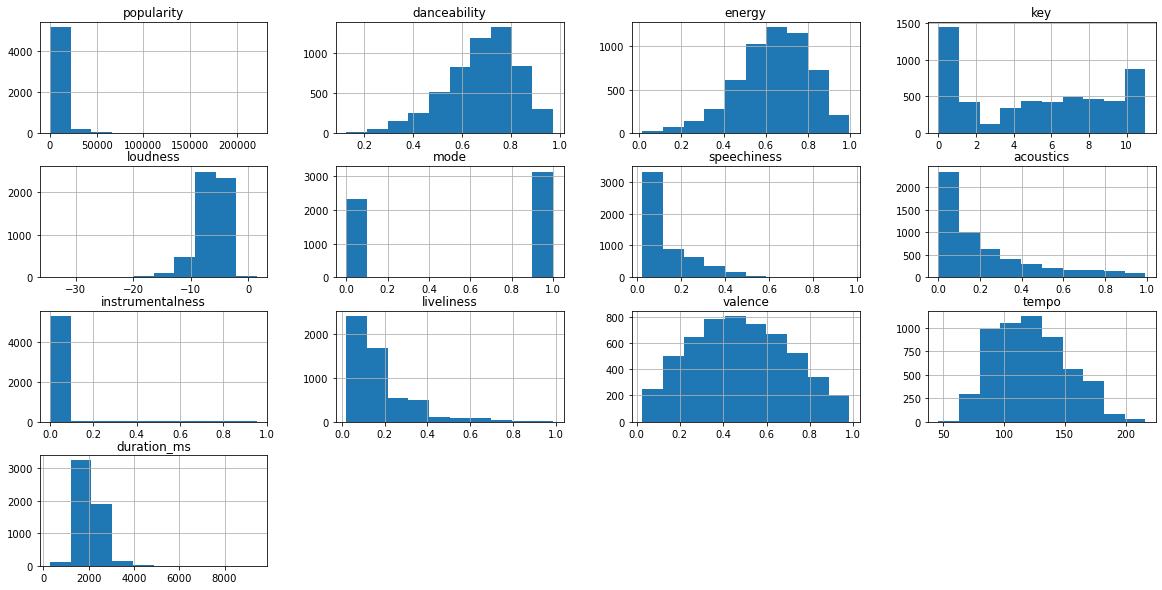

In [219]:
dp.hist(figsize=(20, 10));

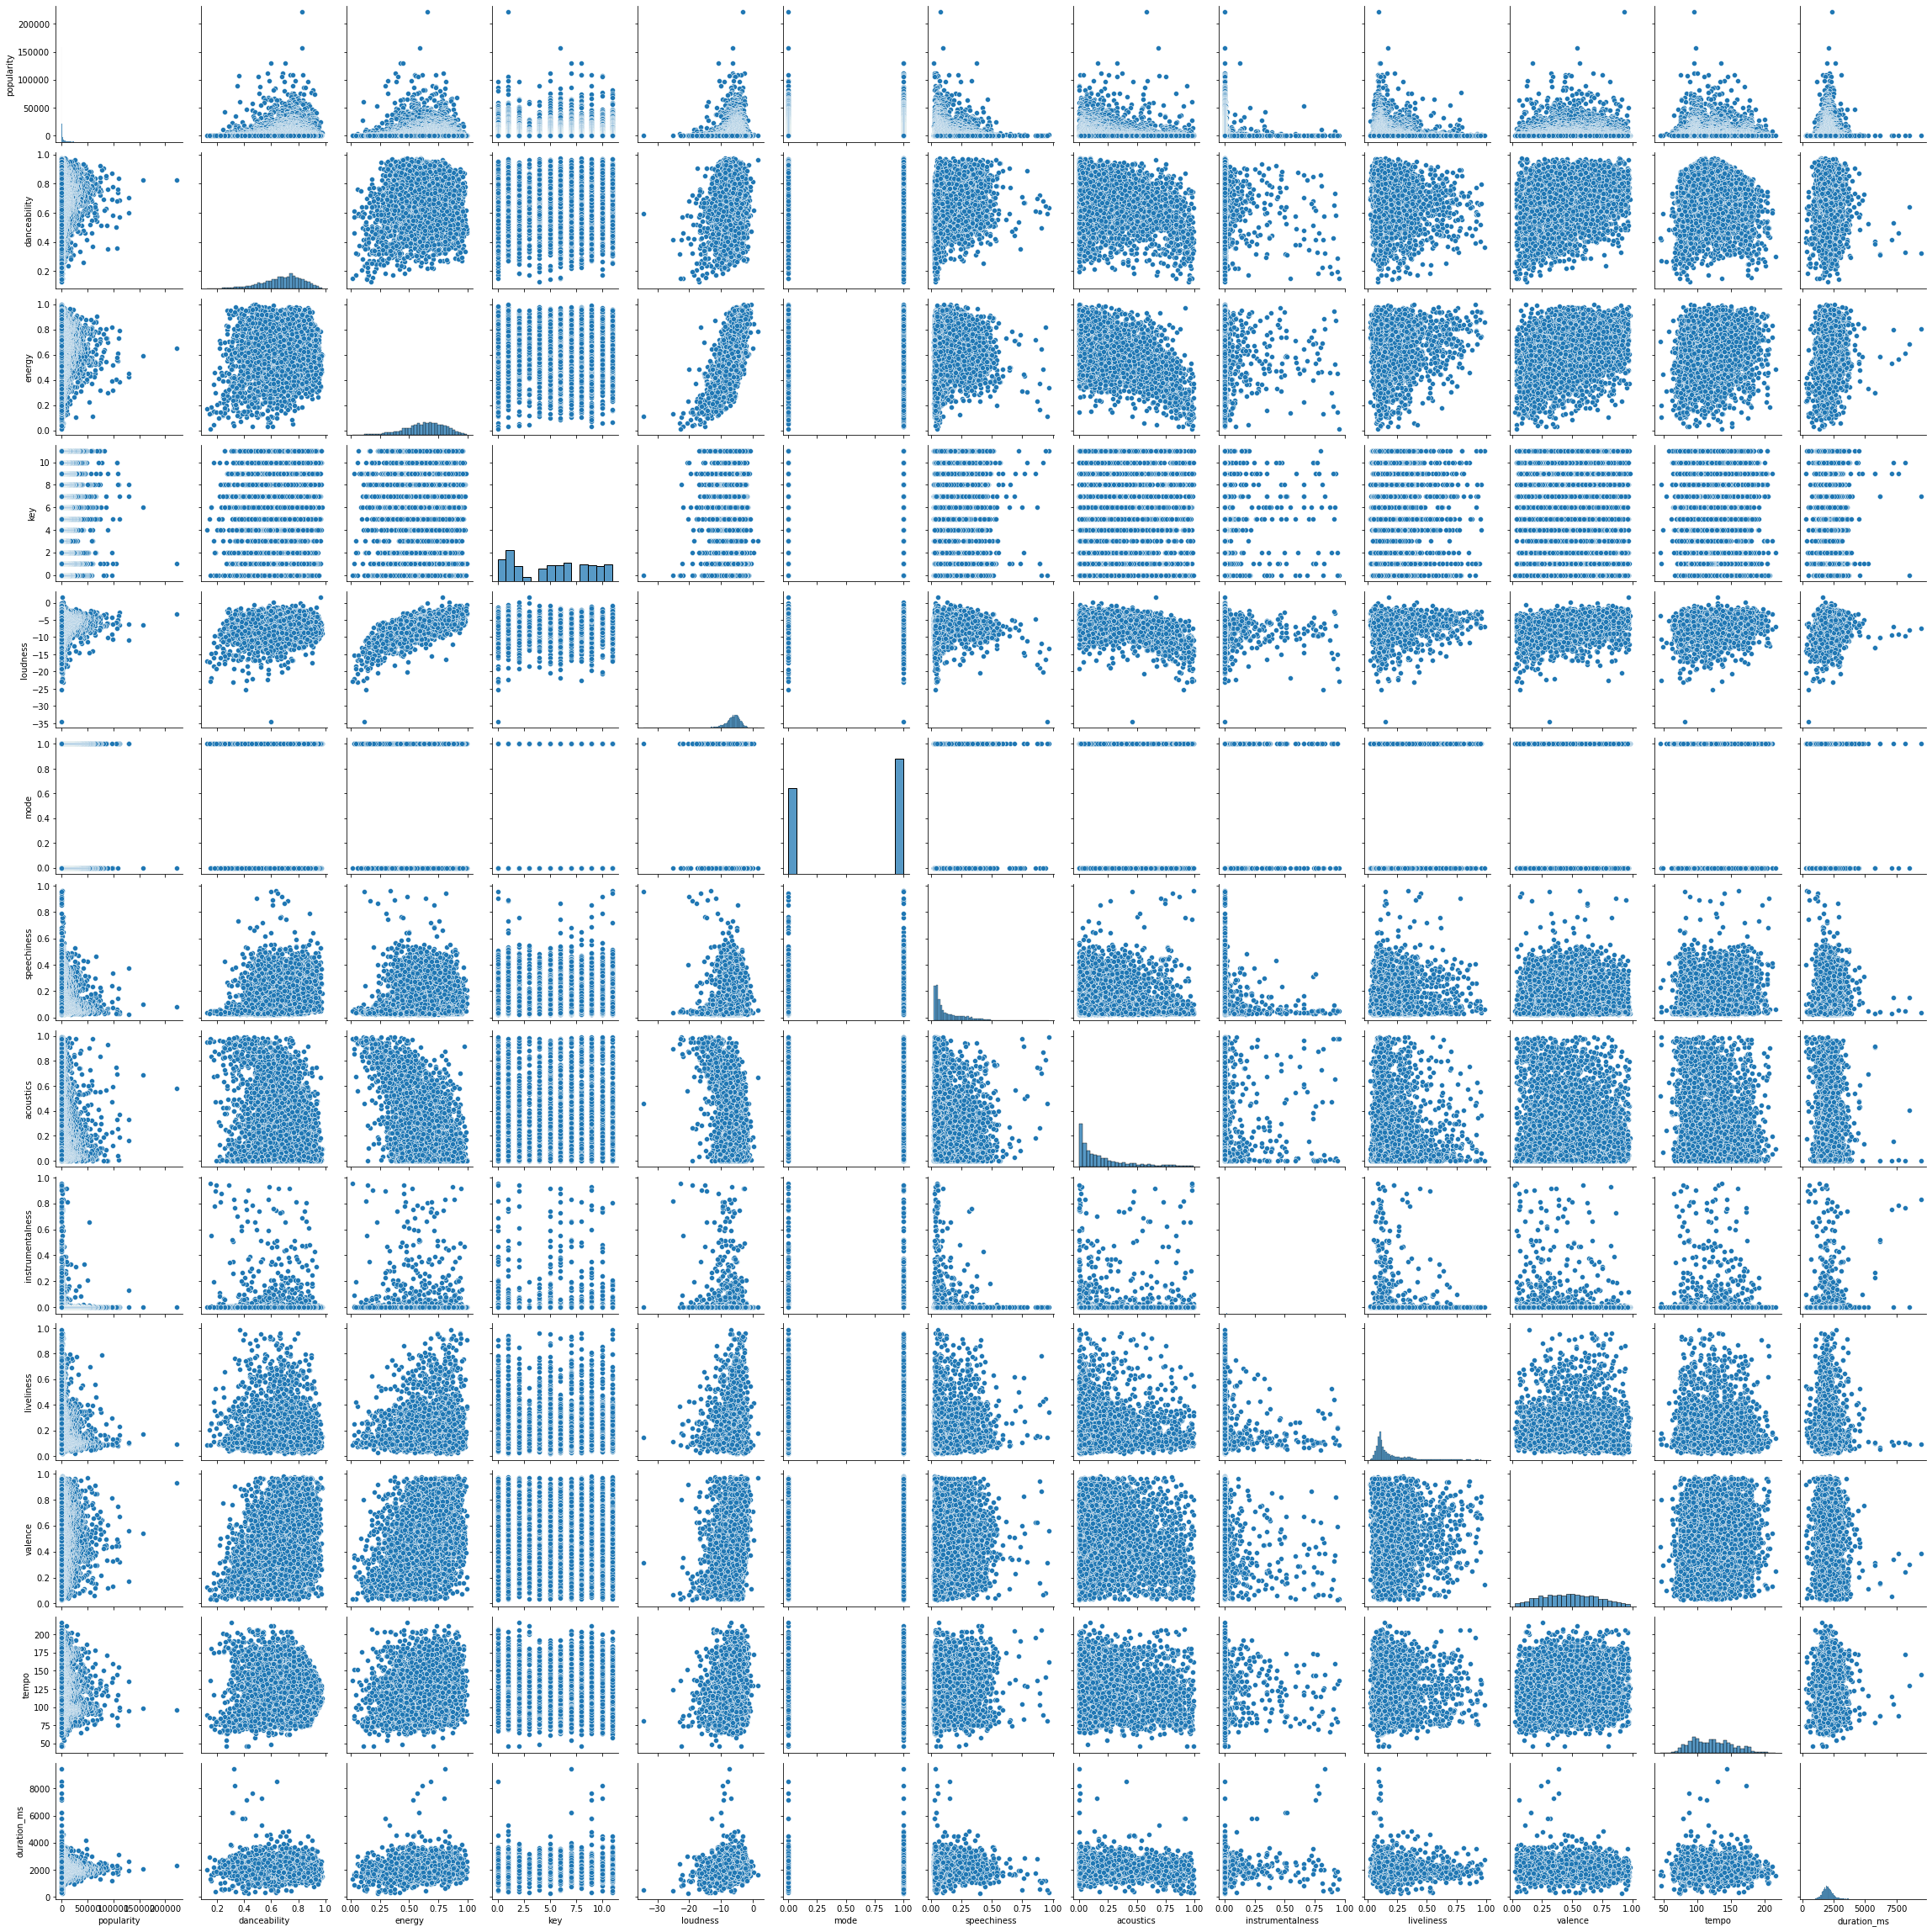

In [220]:
sns.pairplot(dp)

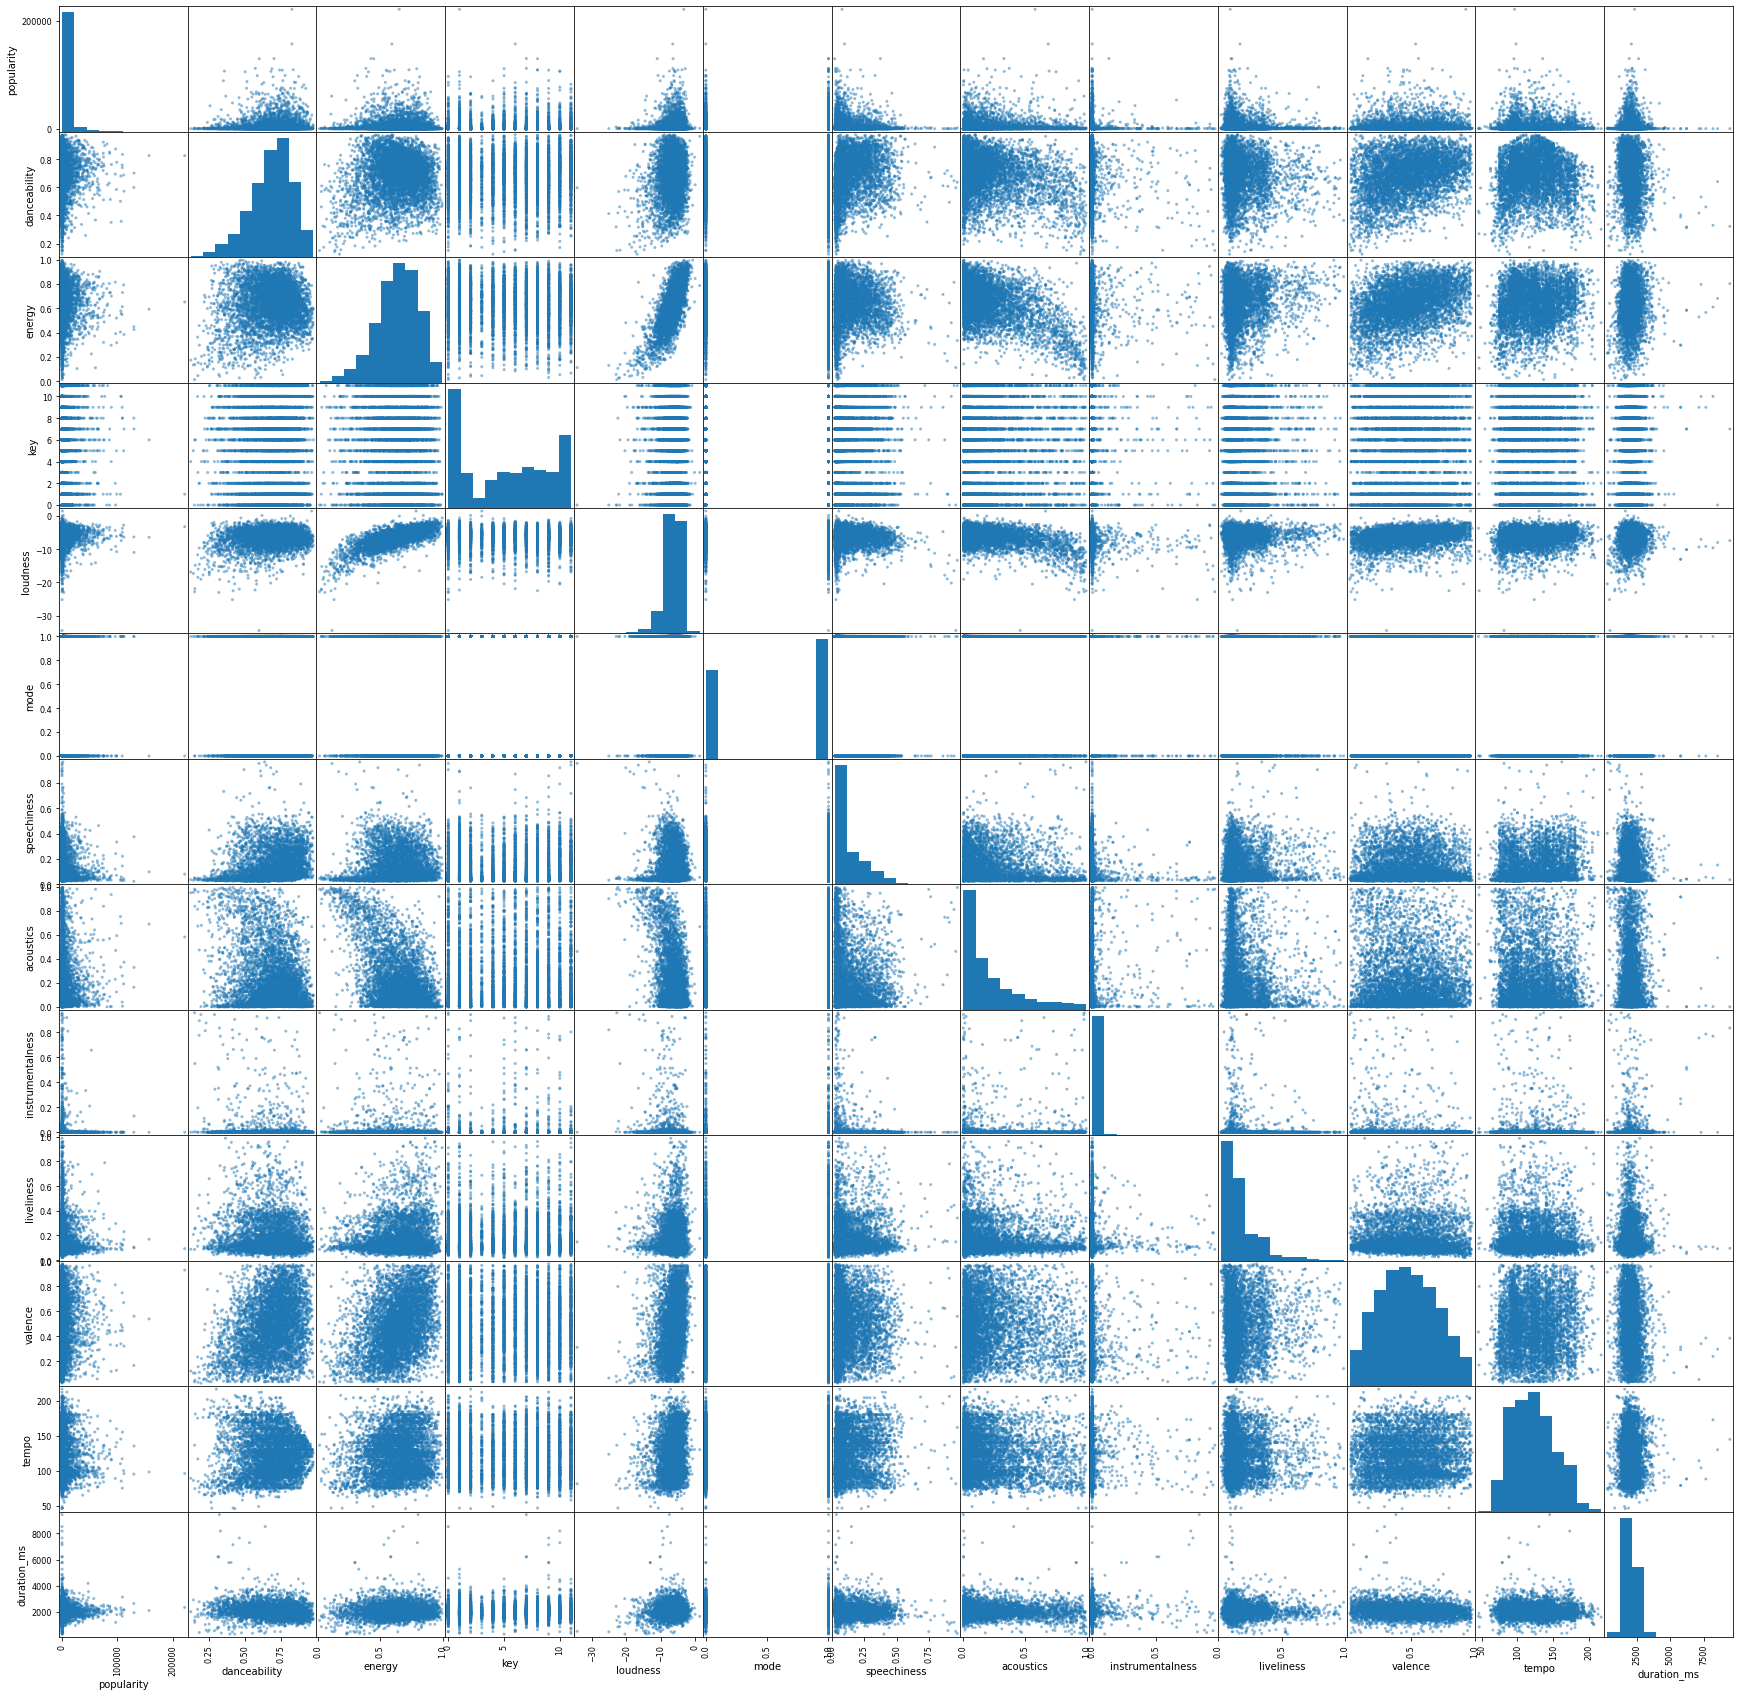

In [221]:
scatter_matrix(dp)
plt.gcf().set_size_inches(30, 30)
plt.show()

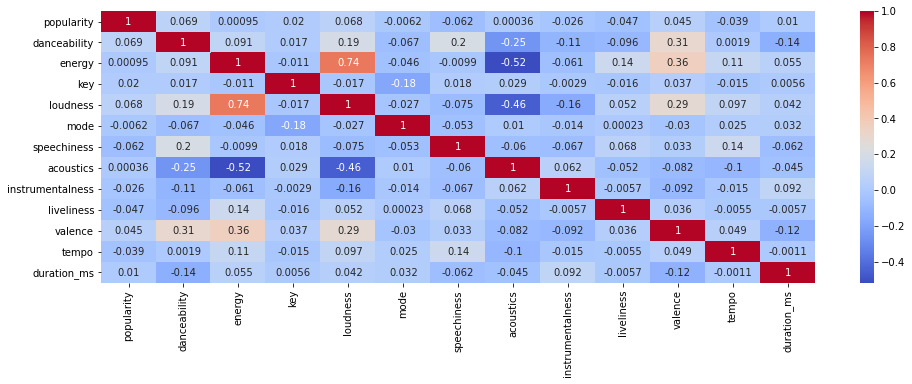

In [188]:
plt.figure(figsize = (16,5))
sns.heatmap(dp.corr(), cmap="coolwarm", annot=True)
plt.show()

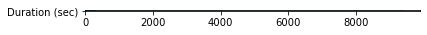

In [215]:
limits = [300,9436]
data_to_plot = ("Duration (sec)", 2074.59)
palette = sns.color_palette("Blues_r", len(limits))

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim

In [216]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, stopwords=["Python", "Matplotlib"]).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [222]:
sns.boxplot( y = dp["Popularity"])
plt.show()

KeyError: 'Popularity'

/Users/andreafought/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


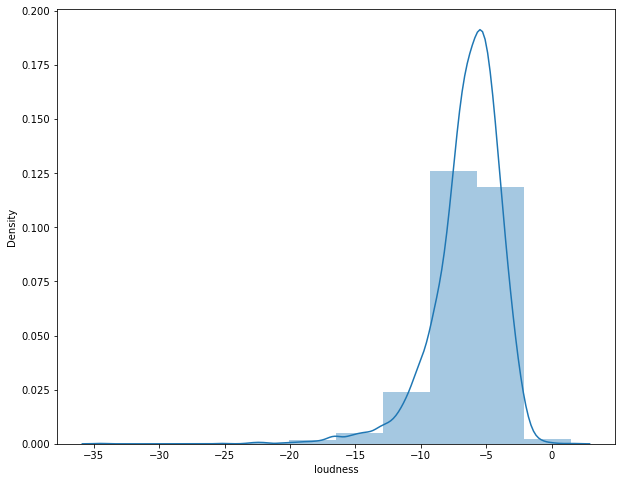

In [185]:
f, ax = plt.subplots(figsize=(10,8))
x = dp['loudness']
ax = sns.distplot(x, bins=10)
plt.show()

/Users/andreafought/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 792x792 with 0 Axes>

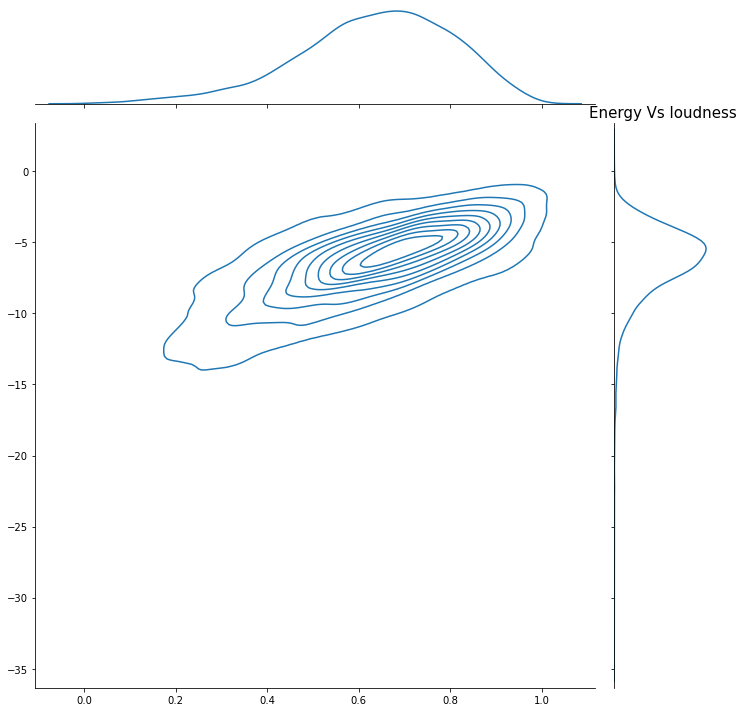

In [184]:
plt.figure(figsize=(11,11))
sns.jointplot(x=dp["energy"].values, y=dp['loudness'].values, size=10, kind="kde",)
plt.ylabel('loudness', fontsize=12)
plt.xlabel("energy", fontsize=12)
plt.title("Energy Vs loudness", fontsize=15)
plt.show();

In [ ]:
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [ ]:
#Convert cleaned dataset into a csv for tableau
dp.to_csv(r'cleandata.csv')

In [129]:
sp.to_csv(r'datagroupbygenre.csv')

In [138]:
top.to_csv(r'top.csv')

In [140]:
low.to_csv(r'low.csv')

In [175]:
gp.to_csv(r'gp.csv')